In [2]:
import pandas as pd

# Show all rows
pd.set_option("display.max_rows", None)

# Show all columns
pd.set_option("display.max_columns", None)

# Make sure wide DataFrames don't wrap
pd.set_option("display.width", None)

# Show the full content of each column (no '...')
pd.set_option("display.max_colwidth", None)

# Our Data Load and Preprocess

### Preprocess

In [3]:
file_path = r"C:\Arun_MIX\Previous\Data\DRGHistoricalReviewInformation_08292025.txt"

df_hist = pd.read_csv(file_path, sep='|', dtype=str, low_memory=False)

print(df_hist.info())
df_hist.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824864 entries, 0 to 824863
Columns: 282 entries, Payor to AdjustedSavings
dtypes: object(282)
memory usage: 1.7+ GB
None


,Payor,claimid,Client,Control_ID,Claim_Number,PaymentType,Group_Type,Payments,Tax_ID,Provider_ID,HospitalName,LOS,DISP_Code,ADRG,DischargeYear,DischargeMonth,AGE,A_CCCount,A_MCCCount,B_CCCount,B_MCCCount,LOB,MRREQ,MRREC,PRIM_DX,A_DX2,A_DX3,A_DX4,A_DX5,A_DX6,A_DX7,A_DX8,A_DX9,A_DX10,A_DX11,A_DX12,A_DX13,A_DX14,A_DX15,A_DX16,A_DX17,A_DX18,A_DX19,A_DX20,A_DX21,A_DX22,A_DX23,A_DX24,A_DX25,A_POA,A_POA2,A_POA3,A_POA4,A_POA5,A_POA6,A_POA7,A_POA8,A_POA9,A_POA10,A_POA11,A_POA12,A_POA13,A_POA14,A_POA15,A_POA16,A_POA17,A_POA18,A_POA19,A_POA20,A_POA21,A_POA22,A_POA23,A_POA24,A_POA25,A_PX1,A_PX2,A_PX3,A_PX4,A_PX5,A_PX6,A_PX7,A_PX8,A_PX9,A_PX10,A_PX11,A_PX12,A_PX13,A_PX14,A_PX15,A_PX16,A_PX17,A_PX18,A_PX19,A_PX20,A_PX21,A_PX22,A_PX23,A_PX24,A_PX25,B_DISPCode,B_DenialCode,B_DRG,B_PRIMDX,B_DX2,B_DX3,B_DX4,B_DX5,B_DX6,B_DX7,B_DX8,B_DX9,B_DX10,B_DX11,B_DX12,B_DX13,B_DX14,B_DX15,B_DX16,B_DX17,B_DX18,B_DX19,B_DX20,B_DX21,B_DX22,B_DX23,B_DX24,B_DX25,B_POA,B_POA2,B_POA3,B_POA4,B_POA5,B_POA6,B_POA7,B_POA8,B_POA9,B_POA10,B_POA11,B_POA12,B_POA13,B_POA14,B_POA15,B_POA16,B_POA17,B_POA18,B_POA19,B_POA20,B_POA21,B_POA22,B_POA23,B_POA24,B_POA25,B_PX1,B_PX2,B_PX3,B_PX4,B_PX5,B_PX6,B_PX7,B_PX8,B_PX9,B_PX10,B_PX11,B_PX12,B_PX13,B_PX14,B_PX15,B_PX16,B_PX17,B_PX18,B_PX19,B_PX20,B_PX21,B_PX22,B_PX23,B_PX24,B_PX25,A_PRIMDX_Desc,A_DX2_Desc,A_DX3_Desc,A_DX4_Desc,A_DX5_Desc,A_DX6_Desc,A_DX7_Desc,A_DX8_Desc,A_DX9_Desc,A_DX10_Desc,A_DX11_Desc,A_DX12_Desc,A_DX13_Desc,A_DX14_Desc,A_DX15_Desc,A_DX16_Desc,A_DX17_Desc,A_DX18_Desc,A_DX19_Desc,A_DX20_Desc,A_DX21_Desc,A_DX22_Desc,A_DX23_Desc,A_DX24_Desc,A_DX25_Desc,A_PX1_Desc,A_PX2_Desc,A_PX3_Desc,A_PX4_Desc,A_PX5_Desc,A_PX6_Desc,A_PX7_Desc,A_PX8_Desc,A_PX9_Desc,A_PX10_Desc,A_PX11_Desc,A_PX12_Desc,A_PX13_Desc,A_PX14_Desc,A_PX15_Desc,A_PX16_Desc,A_PX17_Desc,A_PX18_Desc,A_PX19_Desc,A_PX20_Desc,A_PX21_Desc,A_PX22_Desc,A_PX23_Desc,A_PX24_Desc,A_PX25_Desc,B_PRIMDX_Desc,B_DX2_Desc,B_DX3_Desc,B_DX4_Desc,B_DX5_Desc,B_DX6_Desc,B_DX7_Desc,B_DX8_Desc,B_DX9_Desc,B_DX10_Desc,B_DX11_Desc,B_DX12_Desc,B_DX13_Desc,B_DX14_Desc,B_DX15_Desc,B_DX16_Desc,B_DX17_Desc,B_DX18_Desc,B_DX19_Desc,B_DX20_Desc,B_DX21_Desc,B_DX22_Desc,B_DX23_Desc,B_DX24_Desc,B_DX25_Desc,B_PX1_Desc,B_PX2_Desc,B_PX3_Desc,B_PX4_Desc,B_PX5_Desc,B_PX6_Desc,B_PX7_Desc,B_PX8_Desc,B_PX9_Desc,B_PX10_Desc,B_PX11_Desc,B_PX12_Desc,B_PX13_Desc,B_PX14_Desc,B_PX15_Desc,B_PX16_Desc,B_PX17_Desc,B_PX18_Desc,B_PX19_Desc,B_PX20_Desc,B_PX21_Desc,B_PX22_Desc,B_PX23_Desc,B_PX24_Desc,B_PX25_Desc,InitialDeterminationDate,InitialDenialType,InitialDeterminationStatus,IDSavings,AdjustedSavings
0,UHC CSP,758656,NY,EXPR101623-340919,23N652771000,PrePay,01,15948.41,141340054,000334584002,ST LUKES CORNWALL HOSPITAL,9,02-TRNSF ACUTE CARE FAC,432,2023,9,69,2,2,2,2,NYCARE,2023-10-17 16:38:04.687000000,2023-11-08 00:00:00,K7030,I8511 - MCC,N170 - MCC,K766 - CC,D62 - CC,E119,K7682,F1010,I10,E039,Z794,K3189,E785,Z20822,Z87891,Z7984,Z751,Z741,Z7409,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,,Y,Y,Y,,,,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,30233N1,06L38CZ,06L38CZ,0BH17EZ,5A1945Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02-TRNSF ACUTE CARE FAC,NaN,432,K7030,I8511 - MCC,N170 - MCC,K766 - CC,D62 - CC,E119,K7682,F1010,I10,E039,Z794,K3189,E785,Z20822,Z87891,Z7984,Z751,Z741,Z7409,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,NaN,Y,Y,Y,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,30233N1,06L38CZ,06L38CZ,0BH17EZ,5A1945Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alcoholic cirrhosis of liver without ascites,Secondary esophageal varices with bleeding,Acute kidney failure with tubular necrosis,Portal hypertension,Acute posthemorrhagic anemia,Type 2 diabetes mellitus without complications,Hepatic encephalopathy,"Alcohol abuse, uncomplicated",Essential (primary) hypertension,"Hypothyroidism, unspecified",Long term (current) use of insulin,Other diseases of stomach and duodenum,"Hyperlipidemia, unspecified",Contact with and (suspected) exposure to COVID-19,Personal his

In [4]:
df1 = df_hist.copy()

df1['PaymentType'] = df1['PaymentType'].str.strip().str.lower()

print(df1['InitialDenialType'].value_counts())

df1 = df1[(df1["InitialDeterminationStatus"].isin(["Approved", "Denied"])) & (df1["InitialDenialType"] == "Substantive")]

# filter usable columns alone
df2 = pd.concat([
    df1.iloc[:, 0:17], 
    #df.iloc[:, 16:22], # count of mcc,cc in A and B and LOB
    df1.iloc[:, 21:49], # A part
    #df1.iloc[:, 177:227],# B Part
    df1.iloc[:, 277:],# last 4 columns
    ],axis=1)

print(df2['InitialDeterminationStatus'].value_counts())

# Example: if your DataFrame is called df
cols_to_combine = [
    "A_DX2","A_DX3","A_DX4","A_DX5","A_DX6","A_DX7","A_DX8","A_DX9",
    "A_DX10","A_DX11","A_DX12","A_DX13","A_DX14","A_DX15","A_DX16",
    "A_DX17","A_DX18","A_DX19","A_DX20","A_DX21",'A_DX22','A_DX23','A_DX24','A_DX25'
]

# Combine into one list column
df2["SDX_List"] = df2[cols_to_combine].values.tolist()

# ✅ Optional: remove NaN values from the list
df2["SDX_List"] = df2["SDX_List"].apply(lambda x: [i for i in x if pd.notna(i)])

df3 = df2.drop(df2.columns[21:45], axis=1)
cols_to_drop = [
    'claimid', 'Control_ID', 'Claim_Number', 'Tax_ID',
    'DISP_Code', 'DischargeYear', 'DischargeMonth',
    'MRREQ', 'MRREC', 
    'InitialDeterminationDate', 'InitialDenialType',
    
]

df3 = df3.drop(columns=cols_to_drop, errors='ignore')

    # Columns to convert
float_cols = ['Payments', 'IDSavings', 'AdjustedSavings']
int_cols = ['LOS', 'AGE']

# Convert float columns
for col in float_cols:
    df3[col] = pd.to_numeric(df3[col], errors='coerce').astype('float64')

# Convert integer columns
for col in int_cols:
    df3[col] = pd.to_numeric(df3[col], errors='coerce').astype('Int64')  # use Int64 to keep NaN support


def clean_sdx_list(lst):
    cleaned = []
    for item in lst:
        item = str(item).upper().strip()               # normalize
        item = item.replace("- MCC", "")               # remove MCC
        item = item.replace("- CC", "")                # remove CC
        item = item.replace("MCC", "")                 # safety
        item = item.replace("CC", "")                  # safety
        cleaned.append(item.strip().replace("-", ""))  # final cleanup
    return cleaned
df3["SDX_List_Clean"] = df3["SDX_List"].apply(clean_sdx_list)


# ---------------------------------------------------------
# Step 1: Load MCC/CC Mapping File
# ---------------------------------------------------------
mccandcclist_df = pd.read_excel(r"C:\Users\Akumar\Downloads\MCCCCList.xlsx")
mccandcclist_df['ICDCode'] = (
    mccandcclist_df['ICDCode']
    .astype(str)
    .str.strip()
    .str.upper()
)
mccandcclist = dict(zip(mccandcclist_df['ICDCode'], mccandcclist_df['MCCorCC']))
print(f"✅ Loaded MCC/CC list with {len(mccandcclist)} entries.")
mccandcclist_df.head()

def map_sdx_types(icd_list, lookup_dict):
    cleaned_list = []
    for code in icd_list:
        code_clean = str(code).strip().upper()  # normalize

        tag = lookup_dict.get(code_clean, "")  # MCC / CC / General
        cleaned_list.append(f"{code_clean} - {tag}")

    return cleaned_list
df3['SDX_Type_list'] = df3['SDX_List_Clean'].apply(lambda x: map_sdx_types(x, mccandcclist))

def extract_sdx_info(sdx_list):
    # Separate entries by type
    mcc = [x.split(" - ")[0] for x in sdx_list if "- MCC" in x]
    cc  = [x.split(" - ")[0] for x in sdx_list if "- CC" in x]
    #general  = [x.split(" - ")[0] for x in sdx_list if "- General" in x]
    other = [x.split(" - ")[0] for x in sdx_list if "- MCC" not in x and "- CC" not in x  ]

    # Determine SDX_Type and SDX_Set
    if mcc:
        return "MCC", mcc
    elif cc:
        return "CC", cc
    #elif general:
       # return "General", general
    
    else:
        return "General", other

# Apply the logic
df3[["SDX_Type", "SDX_Set"]] = df3["SDX_Type_list"].apply(lambda x: pd.Series(extract_sdx_info(x)))

# condition: SDX_Set empty AND SDX_Type == "General"
mask = (df3['SDX_Set'].apply(lambda x: len(x) == 0)) & (df3['SDX_Type'] == 'General')

# update SDX_Type
df3.loc[mask, 'SDX_Type'] = 'No SDX'

cols_to_drop = ['SDX_List','SDX_List_Clean','SDX_Type_list']
df4 = df3.drop(columns=cols_to_drop, errors='ignore')

print(df4.info())
df4.head()

InitialDenialType
Substantive    717272
Assumptive     104492
Technical        3100
Name: count, dtype: int64
InitialDeterminationStatus
Approved    517396
Denied      199876
Name: count, dtype: int64
✅ Loaded MCC/CC list with 17913 entries.
<class 'pandas.core.frame.DataFrame'>
Index: 717272 entries, 0 to 824863
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Payor                       717272 non-null  object 
 1   Client                      717272 non-null  object 
 2   PaymentType                 717272 non-null  object 
 3   Group_Type                  717267 non-null  object 
 4   Payments                    717272 non-null  float64
 5   Provider_ID                 717272 non-null  object 
 6   HospitalName                717272 non-null  object 
 7   LOS                         717271 non-null  Int64  
 8   ADRG                        717272 non-null  object 
 9   AGE      

,Payor,Client,PaymentType,Group_Type,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,LOB,PRIM_DX,InitialDeterminationStatus,IDSavings,AdjustedSavings,SDX_Type,SDX_Set
0,UHC CSP,NY,prepay,01,15948.41,000334584002,ST LUKES CORNWALL HOSPITAL,9,432,69,NYCARE,K7030,Approved,0.00,0.00,MCC,"[I8511, N170]"
1,UHC CSP,NY,prepay,01,10477.92,000258115003,ST PETERS HOSPITAL,5,919,62,NYCARE,T85698A,Approved,0.00,0.00,MCC,"[A419, J869]"
2,UHC CSP,NY,prepay,01,11532.33,000657681001,KENMORE MERCY HOSPITAL,3,871,77,NYCARE,A419,Denied,4440.18,5940.31,MCC,"[J159, G9341, R6520]"
3,UHC CSP,IA,postpay,01,12227.79,000023698002,ALLEN HOSPITAL,2,854,60,IADSNP,A419,Denied,3065.19,2733.57,CC,"[N179, N136, Z6843]"
4,UHC CSP,IA,postpay,01,10804.16,000023698002,ALLEN HOSPITAL,5,871,70,IADSNP,A419,Approved,0.00,0.00,MCC,"[D61810, G9341, R6520]"


In [5]:
df5 =  df4[['ADRG', 'PRIM_DX', 'SDX_Set', 'SDX_Type', 
              'InitialDeterminationStatus', 'IDSavings']].copy()

# --- 1. Clean ADRG ---
df5['ADRG'] = df5['ADRG'].astype(str).str.strip().str.upper()

# --- 2. Clean PRIM_DX ---
df5['PRIM_DX'] = df5['PRIM_DX'].astype(str).str.strip().str.upper()

# --- 3. Clean SDX_Type ---
df5['SDX_Type'] = df5['SDX_Type'].astype(str).str.strip().str.upper()

# --- 4. Clean SDX_Set list values ---
def clean_sdx_list(x):
    if isinstance(x, list):
        return [str(i).strip().upper() for i in x]
    return x

df5['SDX_Set'] = df5['SDX_Set'].apply(clean_sdx_list)

df5['SDX_Set_tuple'] = df5['SDX_Set'].apply(
    lambda x: tuple(sorted([str(i).strip().upper() for i in x])) 
              if isinstance(x, list) else tuple()
)


print(df5.info())
df5.head()

# 1. Convert SDX_Set to tuple (already done earlier)
#df5['SDX_Set_tuple'] = df5['SDX_Set'].apply(lambda x: tuple(x) if isinstance(x, list) else ())

# 2. Normalize Status column
df5['InitialDeterminationStatus'] = df5['InitialDeterminationStatus'].astype(str).str.strip().str.upper()

# 3. Create indicator columns
df5['is_approved'] = (df5['InitialDeterminationStatus'] == 'APPROVED').astype(int)
df5['is_denied']   = (df5['InitialDeterminationStatus'] == 'DENIED').astype(int)

# 4. Group and compute metrics
combo_stats = (
    df5.groupby(['ADRG', 'PRIM_DX', 'SDX_Type', 'SDX_Set_tuple'])
        .agg(
            Total_Claims            = ('InitialDeterminationStatus', 'count'),
            Approved                = ('is_approved', 'sum'),
            Denied                  = ('is_denied', 'sum'),
            Total_Savings           = ('IDSavings', 'sum'),
        )
        .reset_index()
)

# 5. Derived metrics
combo_stats['Approval_Percent']      = combo_stats['Approved'] / combo_stats['Total_Claims']
combo_stats['Denial_Percent']        = combo_stats['Denied'] / combo_stats['Total_Claims']
combo_stats['Avg_Saving_Per_Denial'] = combo_stats['Total_Savings'] / combo_stats['Denied'].replace(0, None)
combo_stats['Avg_Saving_Per_Claim']  = combo_stats['Total_Savings'] / combo_stats['Total_Claims']
combo_stats['Avg_Saving_Per_Denial'] = combo_stats['Avg_Saving_Per_Denial'].fillna(0.0)


def approval_tag_extended(row):
    total = row['Total_Claims']
    p = row['Approval_Percent']

    # First condition: Total_Claims <= 100
    if total <= 100:
        return "Under_100_claim"

    # Now apply original approval percentage logic
    if 95 < p <= 100:
        return "App_95to100"
    elif 90 < p <= 95:
        return "App_90to95"
    elif 85 < p <= 90:
        return "App_85to90"
    elif 80 < p <= 85:
        return "App_80to85"
    else:
        return "Below_80"

# apply using axis=1 (because we need both columns)
combo_stats["Approval_Tag_greater_than_100_total_claims"] = combo_stats.apply(approval_tag_extended, axis=1)


def denial_tag_extended(row):
    total = row['Total_Claims']
    p = row['Denial_Percent']

    # First condition
    if total <= 100:
        return "Under_100_claim"

    # Apply denial % logic
    if 95 < p <= 100:
        return "Den_95to100"
    elif 90 < p <= 95:
        return "Den_90to95"
    elif 85 < p <= 90:
        return "Den_85to90"
    elif 80 < p <= 85:
        return "Den_80to85"
    else:
        return "Below_80"

# Apply row-wise
combo_stats["Denial_Tag_greater_than_100_total_claims"] = combo_stats.apply(denial_tag_extended, axis=1)

# Frequency of each approval tag
approval_freq = combo_stats['Approval_Tag_greater_than_100_total_claims'].value_counts()

# Convert frequency → weight (inverse frequency)
approval_weight_map = (1 / approval_freq) / (1 / approval_freq).min()
approval_weight_map = approval_weight_map.to_dict()

denial_freq = combo_stats['Denial_Tag_greater_than_100_total_claims'].value_counts()
denial_weight_map = (1 / denial_freq) / (1 / denial_freq).min()
denial_weight_map = denial_weight_map.to_dict()

def normalize_weights_with_under100(weight_dict):
    import numpy as np

    # copy so original dict is safe
    stats = weight_dict.copy()

    # take out special case
    under_100_value = stats.pop("Under_100_claim", None)

    # normalize remaining values
    values = np.array(list(stats.values()), dtype=float)
    normalized_values = values / values.sum()

    # build new dict
    normalized_dict = dict(zip(stats.keys(), normalized_values))

    # add it back
    normalized_dict["Under_100_claim"] = under_100_value

    return normalized_dict

approval_weight_map = normalize_weights_with_under100(approval_weight_map)
denial_weight_map = normalize_weights_with_under100(denial_weight_map)


combo_stats['Approval_Wt'] = combo_stats['Approval_Tag_greater_than_100_total_claims'] \
                                .map(approval_weight_map)

combo_stats['Denial_Wt'] = combo_stats['Denial_Tag_greater_than_100_total_claims'] \
                                .map(denial_weight_map)

combo_stats['Final_Wt'] = combo_stats['Approval_Wt'] * combo_stats['Denial_Wt']
print(combo_stats.info())
combo_stats.head()



<class 'pandas.core.frame.DataFrame'>
Index: 717272 entries, 0 to 824863
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ADRG                        717272 non-null  object 
 1   PRIM_DX                     717272 non-null  object 
 2   SDX_Set                     717272 non-null  object 
 3   SDX_Type                    717272 non-null  object 
 4   InitialDeterminationStatus  717272 non-null  object 
 5   IDSavings                   717272 non-null  float64
 6   SDX_Set_tuple               717272 non-null  object 
dtypes: float64(1), object(6)
memory usage: 43.8+ MB
None


C:\Users\Akumar\AppData\Local\Temp\13\ipykernel_29996\642101738.py:57: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combo_stats['Avg_Saving_Per_Denial'] = combo_stats['Avg_Saving_Per_Denial'].fillna(0.0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410241 entries, 0 to 410240
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   ADRG                                        410241 non-null  object 
 1   PRIM_DX                                     410241 non-null  object 
 2   SDX_Type                                    410241 non-null  object 
 3   SDX_Set_tuple                               410241 non-null  object 
 4   Total_Claims                                410241 non-null  int64  
 5   Approved                                    410241 non-null  int64  
 6   Denied                                      410241 non-null  int64  
 7   Total_Savings                               410241 non-null  float64
 8   Approval_Percent                            410241 non-null  float64
 9   Denial_Percent                              410241 non-null  float64
 

,ADRG,PRIM_DX,SDX_Type,SDX_Set_tuple,Total_Claims,Approved,Denied,Total_Savings,Approval_Percent,Denial_Percent,Avg_Saving_Per_Denial,Avg_Saving_Per_Claim,Approval_Tag_greater_than_100_total_claims,Denial_Tag_greater_than_100_total_claims,Approval_Wt,Denial_Wt,Final_Wt
0,0000,A419,CC,"(J90, Z942)",1,1,0,0.0,1.0,0.0,0.0,0.0,Under_100_claim,Under_100_claim,1.0,1.0,1.0
1,001,I130,MCC,"(A419, I5023, J189, J9621, K7200, R570, R6521)",1,1,0,0.0,1.0,0.0,0.0,0.0,Under_100_claim,Under_100_claim,1.0,1.0,1.0
2,001,I130,MCC,"(I5023, K661, K8590, N170)",1,1,0,0.0,1.0,0.0,0.0,0.0,Under_100_claim,Under_100_claim,1.0,1.0,1.0
3,001,I130,MCC,"(I5023, N170, O903, R570)",1,1,0,0.0,1.0,0.0,0.0,0.0,Under_100_claim,Under_100_claim,1.0,1.0,1.0
4,001,I130,MCC,"(I5023, R570)",1,1,0,0.0,1.0,0.0,0.0,0.0,Under_100_claim,Under_100_claim,1.0,1.0,1.0


In [6]:
df6 = df4.copy()

df6['SDX_Set_tuple'] = df6['SDX_Set'].apply(
    lambda x: tuple(sorted([str(i).strip().upper() for i in x])) 
              if isinstance(x, list) else tuple()
)

df6['ADRG'] = df6['ADRG'].astype(str).str.strip().str.upper()
df6['PRIM_DX'] = df6['PRIM_DX'].astype(str).str.strip().str.upper()
df6['SDX_Type'] = df6['SDX_Type'].astype(str).str.strip().str.upper()

combo_stats['PRIM_DX'] = combo_stats['PRIM_DX'].astype(str).str.strip().str.upper()
combo_stats['ADRG'] = combo_stats['ADRG'].astype(str).str.strip().str.upper()
combo_stats['SDX_Type'] = combo_stats['SDX_Type'].astype(str).str.strip().str.upper()

merged_df = df6.merge(
    combo_stats,
    how='left',
    left_on=['ADRG', 'PRIM_DX', 'SDX_Set_tuple', 'SDX_Type'],
    right_on=['ADRG', 'PRIM_DX', 'SDX_Set_tuple', 'SDX_Type']
)
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717272 entries, 0 to 717271
Data columns (total 31 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Payor                                       717272 non-null  object 
 1   Client                                      717272 non-null  object 
 2   PaymentType                                 717272 non-null  object 
 3   Group_Type                                  717267 non-null  object 
 4   Payments                                    717272 non-null  float64
 5   Provider_ID                                 717272 non-null  object 
 6   HospitalName                                717272 non-null  object 
 7   LOS                                         717271 non-null  Int64  
 8   ADRG                                        717272 non-null  object 
 9   AGE                                         717271 non-null  Int64  
 

🔹 Correlation of each numeric feature with Status_binary (sorted):
           Feature  Correlation_with_Status
0         Payments                 0.039343
1              AGE                 0.037956
2              LOS                 0.010902
3        IDSavings                -0.037364
4  AdjustedSavings                -0.418579


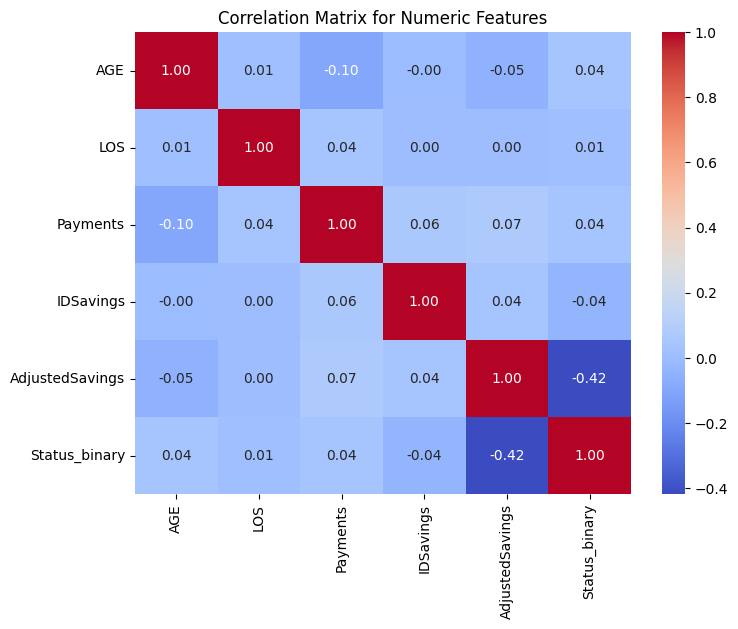

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = merged_df.copy()

# 1️⃣ Convert status to binary (Approved=1, Denied=0)
df["Status_binary"] = df["InitialDeterminationStatus"].str.strip().str.lower().map({
    "approved": 1,
    "denied": 0
})

# 2️⃣ Define numeric columns for correlation
numeric_cols = ["AGE", "LOS", "Payments", "IDSavings", "AdjustedSavings", "Status_binary"]

# 3️⃣ Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# 4️⃣ Extract correlation values with respect to Status_binary
corr_with_status = corr_matrix["Status_binary"].drop("Status_binary")

# 5️⃣ Sort correlations in descending order
corr_sorted = corr_with_status.sort_values(ascending=False).reset_index()
corr_sorted.columns = ["Feature", "Correlation_with_Status"]

# ✅ Display top correlations
print("🔹 Correlation of each numeric feature with Status_binary (sorted):")
print(corr_sorted)

# 6️⃣ Optional: plot full correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numeric Features")
plt.show()


In [8]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# List of categorical columns
categorical_columns = ['Payor', 'Client', 'PaymentType', 'Group_Type', 'ADRG', 'LOB', 'PRIM_DX','Provider_ID','SDX_Type','HospitalName']

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()

df5_encoded = df.copy()

for col in categorical_columns:
    df5_encoded[col] = label_encoder.fit_transform(df5_encoded[col].astype(str))

# Encode target variable if it's categorical
if df5_encoded['InitialDeterminationStatus'].dtype == 'object':
    df5_encoded['InitialDeterminationStatus'] = label_encoder.fit_transform(df5_encoded['InitialDeterminationStatus'])

# Perform chi-squared test
chi2_values, p_values = chi2(df5_encoded[categorical_columns], df5_encoded['InitialDeterminationStatus'])

# Create a results DataFrame
chi2_results = pd.DataFrame({
    'Feature': categorical_columns,
    'Chi2 Statistic': chi2_values,
    'P-Value': p_values
})

# Sort by Chi² Statistic in descending order
chi2_results = chi2_results.sort_values(by='Chi2 Statistic', ascending=False).reset_index(drop=True)

print("🔍 Chi-Squared Feature Importance (Descending Order):")
print(chi2_results)


🔍 Chi-Squared Feature Importance (Descending Order):
        Feature  Chi2 Statistic        P-Value
0       PRIM_DX    4.570018e+07   0.000000e+00
1   Provider_ID    1.910803e+07   0.000000e+00
2          ADRG    3.437943e+06   0.000000e+00
3           LOB    2.954913e+04   0.000000e+00
4  HospitalName    2.167368e+04   0.000000e+00
5    Group_Type    9.794186e+03   0.000000e+00
6   PaymentType    2.259710e+03   0.000000e+00
7      SDX_Type    8.187254e+02  4.580127e-180
8         Payor    4.670611e+02  1.397311e-103
9        Client    2.284678e+02   1.286766e-51


In [9]:
# 1️⃣ Convert status to binary (Approved=1, Denied=0)
merged_df["Status_binary"] = merged_df["InitialDeterminationStatus"].str.strip().str.lower().map({
    "approved": 1,
    "denied": 0
})
df_ml =  merged_df[['Provider_ID','AGE','LOS','PaymentType',"Payments",'LOB','Group_Type',
            'HospitalName','ADRG','PRIM_DX','SDX_Type','SDX_Set_tuple','Status_binary','Final_Wt']].copy()

print(df_ml.info())
df_ml.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717272 entries, 0 to 717271
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Provider_ID    717272 non-null  object 
 1   AGE            717271 non-null  Int64  
 2   LOS            717271 non-null  Int64  
 3   PaymentType    717272 non-null  object 
 4   Payments       717272 non-null  float64
 5   LOB            717271 non-null  object 
 6   Group_Type     717267 non-null  object 
 7   HospitalName   717272 non-null  object 
 8   ADRG           717272 non-null  object 
 9   PRIM_DX        717272 non-null  object 
 10  SDX_Type       717272 non-null  object 
 11  SDX_Set_tuple  717272 non-null  object 
 12  Status_binary  717272 non-null  int64  
 13  Final_Wt       717272 non-null  float64
dtypes: Int64(2), float64(2), int64(1), object(9)
memory usage: 78.0+ MB
None


,Provider_ID,AGE,LOS,PaymentType,Payments,LOB,Group_Type,HospitalName,ADRG,PRIM_DX,SDX_Type,SDX_Set_tuple,Status_binary,Final_Wt
0,000334584002,69,9,prepay,15948.41,NYCARE,01,ST LUKES CORNWALL HOSPITAL,432,K7030,MCC,"(I8511, N170)",1,1.0
1,000258115003,62,5,prepay,10477.92,NYCARE,01,ST PETERS HOSPITAL,919,T85698A,MCC,"(A419, J869)",1,1.0
2,000657681001,77,3,prepay,11532.33,NYCARE,01,KENMORE MERCY HOSPITAL,871,A419,MCC,"(G9341, J159, R6520)",0,1.0
3,000023698002,60,2,postpay,12227.79,IADSNP,01,ALLEN HOSPITAL,854,A419,CC,"(N136, N179, Z6843)",0,1.0
4,000023698002,70,5,postpay,10804.16,IADSNP,01,ALLEN HOSPITAL,871,A419,MCC,"(D61810, G9341, R6520)",1,1.0


In [10]:
import re
import pandas as pd

def extract_unique_icd(df, col_name="SDX_Set_tuple"):
    unique_icd = set()
    invalid_entries = []  # store invalid values with row index for inspection

    for idx, val in df[col_name].items():
        icd_list = []

        # ✅ Case 1: already a tuple
        if isinstance(val, tuple):
            icd_list = val

        # ✅ Case 2: comma-separated string
        elif isinstance(val, str):
            icd_list = tuple(val.split(","))

        # 🚫 Case 3: invalid type
        else:
            invalid_entries.append({"index": idx, "invalid_value": val})
            continue

        # 🔥 Clean + strip + uppercase each ICD code
        cleaned = [
            re.sub(r"[^A-Za-z0-9.\-]", "", str(icd).strip()).upper()
            for icd in icd_list
            if str(icd).strip()  # not empty
        ]

        unique_icd.update(cleaned)

    # ✅ Create DataFrame for valid ICDs
    unique_icd_df = pd.DataFrame(sorted(unique_icd), columns=["Unique_ICD"])
    unique_icd_df = unique_icd_df[
        unique_icd_df["Unique_ICD"].astype(str).str.strip() != ""
    ].reset_index(drop=True)

    # ⚠️ Invalid entries
    invalid_df = pd.DataFrame(invalid_entries)

    return unique_icd_df, invalid_df



# ✅ Example usage:
unique_icd_df, invalid_df = extract_unique_icd(df_ml, "SDX_Set_tuple")

# ✅ Strip spaces and get unique values (for another column like PRIM_DX)
unique_values = df_ml['PRIM_DX'].astype(str).str.strip().str.upper().unique()


# ✅ Convert to a DataFrame
unique_df = pd.DataFrame(unique_values, columns=['Unique_ICD']) 

# 2️⃣ Concatenate and drop duplicates
union_df1 = pd.concat([unique_icd_df, unique_df], ignore_index=True).drop_duplicates().reset_index(drop=True)

union_df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14192 entries, 0 to 14191
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unique_ICD  14192 non-null  object
dtypes: object(1)
memory usage: 111.0+ KB


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
pretrained_embedding = pd.read_json("hf://datasets/attuneengineering/ICD_10_Embedding_Collection/ICD_10_embedding_collection.json")
#print(pretrained_embedding.info())
#pretrained_embedding.head()

# Create new DataFrame with only the 3 columns
df_pretrained = pretrained_embedding[['id', 'embedding']].copy()
df_pretrained['id'] = df_pretrained['id'].astype(str).str.strip().str.upper()

C:\Users\Akumar\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
union_df = union_df1.merge(df_pretrained,how='left',left_on='Unique_ICD',right_on='id')
# Replace NaN with list of 512 zeros
union_df['embedding'] = union_df['embedding'].apply(
    lambda x: [0.0]*512 if isinstance(x, float) and pd.isna(x) else x
)
union_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14192 entries, 0 to 14191
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unique_ICD  14192 non-null  object
 1   id          14031 non-null  object
 2   embedding   14192 non-null  object
dtypes: object(3)
memory usage: 332.8+ KB


In [13]:
# Ensure embeddings are np.array type
union_df['embedding'] = union_df['embedding'].apply(np.array)

# Create ICD → embedding dictionary
icd_to_emb = dict(zip(union_df['Unique_ICD'], union_df['embedding']))

In [14]:
import numpy as np
import ast

# ---------------------------------------
# Helper: return embedding or zero vector
# ---------------------------------------
def get_embedding(code, icd_to_emb, embedding_dim=512):
    if code in icd_to_emb:
        return icd_to_emb[code]
    else:
        return np.zeros(embedding_dim)

# ---------------------------------------
# Map SDX list → list of embeddings
# ---------------------------------------
def map_icd_embeddings(icd_list, icd_to_emb, embedding_dim=512):
    # Convert tuple → list
    icd_list = list(icd_list)

    # Return list of embeddings (each 512-dim)
    return [
        get_embedding(c, icd_to_emb, embedding_dim)
        for c in icd_list
    ]

embedding_dim = 512

# ---------------------------------------
# Apply to dataframe
# ---------------------------------------
df_ml['SDX_Set_embeddings'] = df_ml['SDX_Set_tuple'].apply(
    lambda codes: map_icd_embeddings(codes, icd_to_emb, embedding_dim)
)

df_ml['PRIM_DX_emb'] = df_ml['PRIM_DX'].apply(
    lambda code: get_embedding(code, icd_to_emb, embedding_dim)
)

print(df_ml.info())
df_ml.head(1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717272 entries, 0 to 717271
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Provider_ID         717272 non-null  object 
 1   AGE                 717271 non-null  Int64  
 2   LOS                 717271 non-null  Int64  
 3   PaymentType         717272 non-null  object 
 4   Payments            717272 non-null  float64
 5   LOB                 717271 non-null  object 
 6   Group_Type          717267 non-null  object 
 7   HospitalName        717272 non-null  object 
 8   ADRG                717272 non-null  object 
 9   PRIM_DX             717272 non-null  object 
 10  SDX_Type            717272 non-null  object 
 11  SDX_Set_tuple       717272 non-null  object 
 12  Status_binary       717272 non-null  int64  
 13  Final_Wt            717272 non-null  float64
 14  SDX_Set_embeddings  717272 non-null  object 
 15  PRIM_DX_emb         717272 non-nul

Provider_ID  AGE  LOS PaymentType  Payments       LOB Group_Type  \
0  000334584002   69    9      prepay  15948.41  NYCARE           01   

                 HospitalName ADRG PRIM_DX SDX_Type  SDX_Set_tuple  \
0  ST LUKES CORNWALL HOSPITAL  432   K7030      MCC  (I8511, N170)   

   Status_binary  Final_Wt  \
0              1       1.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class QueryAttentionPooling(nn.Module):
    def __init__(self, embedding_dim=512):
        super().__init__()
        self.query = nn.Parameter(torch.randn(embedding_dim))

    def forward(self, x):
        """
        x: tensor shape (N_codes, embedding_dim)
        returns: pooled vector (embedding_dim,)
        """
        if x.ndim == 1:
            return x

        q = F.normalize(self.query, dim=0)   # (D,)
        x_norm = F.normalize(x, dim=1)       # (N, D)

        scores = torch.matmul(x_norm, q)      # (N,)
        weights = F.softmax(scores, dim=0)    # (N,)

        pooled = torch.sum(x * weights.unsqueeze(1), dim=0)
        return pooled

att_layer = QueryAttentionPooling(embedding_dim=512)


In [16]:
def pool_sdx_attention(emb_list):
    if len(emb_list) == 0:
        return np.zeros(512)

    x = torch.tensor(np.vstack(emb_list), dtype=torch.float32)
    pooled = att_layer(x).detach().numpy()
    return pooled

df_ml['SDX_agg_emb'] = df_ml['SDX_Set_embeddings'].apply(pool_sdx_attention)


In [17]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717272 entries, 0 to 717271
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Provider_ID         717272 non-null  object 
 1   AGE                 717271 non-null  Int64  
 2   LOS                 717271 non-null  Int64  
 3   PaymentType         717272 non-null  object 
 4   Payments            717272 non-null  float64
 5   LOB                 717271 non-null  object 
 6   Group_Type          717267 non-null  object 
 7   HospitalName        717272 non-null  object 
 8   ADRG                717272 non-null  object 
 9   PRIM_DX             717272 non-null  object 
 10  SDX_Type            717272 non-null  object 
 11  SDX_Set_tuple       717272 non-null  object 
 12  Status_binary       717272 non-null  int64  
 13  Final_Wt            717272 non-null  float64
 14  SDX_Set_embeddings  717272 non-null  object 
 15  PRIM_DX_emb         717272 non-nul

### Model 2 -  Cateboost Regressor

In [27]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# -----------------------------
# 1. Define features
# -----------------------------
cat_features = ["ADRG", "SDX_Type", "Provider_ID", "LOB", "HospitalName"]
num_features = ["Payments", "AGE", "LOS"]

# Dense embedding features (already 512 dims each)
emb_features = ["PRIM_DX_emb", "SDX_agg_emb"]

# IMPORTANT: convert embedding lists to separate numeric columns
emb_prim = np.vstack(df_ml["PRIM_DX_emb"].values)
emb_sdx  = np.vstack(df_ml["SDX_agg_emb"].values)

for i in range(emb_prim.shape[1]):
    df_ml[f"PRIM_emb_{i}"] = emb_prim[:, i]

for i in range(emb_sdx.shape[1]):
    df_ml[f"SDX_emb_{i}"] = emb_sdx[:, i]

# Final feature list
feature_cols = cat_features + num_features + \
    [f"PRIM_emb_{i}" for i in range(512)] + \
    [f"SDX_emb_{i}" for i in range(512)]

C:\Users\Akumar\AppData\Local\Temp\6\ipykernel_14544\2093704350.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ml[f"PRIM_emb_{i}"] = emb_prim[:, i]
C:\Users\Akumar\AppData\Local\Temp\6\ipykernel_14544\2093704350.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ml[f"PRIM_emb_{i}"] = emb_prim[:, i]
C:\Users\Akumar\AppData\Local\Temp\6\ipykernel_14544\2093704350.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Co

In [28]:
# -----------------------------
# 2. Split data
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    df_ml[feature_cols],
    df_ml["target_column"],   # <--- replace with your regression target
    test_size=0.2,
    random_state=42
)

# -----------------------------
# 3. CatBoost Pool (handles categories automatically)
# -----------------------------
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool  = Pool(X_test,  y_test,  cat_features=cat_features)

KeyError: 'target_column'

In [ ]:
# -----------------------------
# 4. Train CatBoost Regressor
# -----------------------------
model = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.03,
    depth=8,
    loss_function="RMSE",
    eval_metric="RMSE",
    od_type="Iter",
    od_wait=50,
    random_seed=42,
    verbose=100
)

model.fit(train_pool, eval_set=test_pool)

# -----------------------------
# 5. Evaluate
# -----------------------------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)
print("R2:", r2_score(y_test, y_pred))


### 20251118 Model 1 - Lightgbm regressor

In [17]:
from sklearn.feature_extraction import FeatureHasher
from scipy import sparse
import numpy as np

# ---------------------------------------------------
# 1. AUTO-CALCULATE HASH SIZES BASED ON UNIQUE VALUES
# ---------------------------------------------------

cat_cols = ["ADRG", "SDX_Type", "Provider_ID", "LOB", "HospitalName"]

def next_power_of_two(x):
    return 1 << (x - 1).bit_length()

def compute_hash_size(unique_count):
    if unique_count <= 20:
        target = unique_count * 2
    elif unique_count <= 200:
        target = unique_count * 3
    else:
        target = unique_count * 4
    target = max(target, 16)
    return next_power_of_two(target)

HASH_SIZES = {}

print("----- AUTO HASH SIZE CALCULATION -----")
for col in cat_cols:
    uniq = df_ml[col].nunique()
    hsize = compute_hash_size(uniq)
    HASH_SIZES[col] = hsize
    print(f"{col}: unique={uniq}, hash_size={hsize}")

print("\nFINAL HASH_SIZES:", HASH_SIZES)


# ---------------------------------------------------
# 2. HASHING FUNCTION (per-column)
# ---------------------------------------------------
def hash_column(series, n_features):
    hasher = FeatureHasher(n_features=n_features, input_type="string")
    
    # FIX: wrap into list-of-list for FeatureHasher
    iterable_input = [[str(v)] for v in series.values]

    return hasher.transform(iterable_input)


# ---------------------------------------------------
# 3. Apply hashing using *dynamic* HASH_SIZES
# ---------------------------------------------------
X_adrg  = hash_column(df_ml["ADRG"],          HASH_SIZES["ADRG"])
X_sdx   = hash_column(df_ml["SDX_Type"],      HASH_SIZES["SDX_Type"])
X_pid   = hash_column(df_ml["Provider_ID"],   HASH_SIZES["Provider_ID"])
X_lob   = hash_column(df_ml["LOB"],           HASH_SIZES["LOB"])
X_hname = hash_column(df_ml["HospitalName"],  HASH_SIZES["HospitalName"])

print("\n----- HASHED SHAPES -----")
print("ADRG hashed:        ", X_adrg.shape)
print("SDX_Type hashed:    ", X_sdx.shape)
print("Provider_ID hashed: ", X_pid.shape)
print("LOB hashed:         ", X_lob.shape)
print("HospitalName hashed:", X_hname.shape)


# ---------------------------------------------------
# 4. Combine into final sparse categorical matrix
# ---------------------------------------------------
X_cat_sparse = sparse.hstack(
    [X_adrg, X_sdx, X_pid, X_lob, X_hname],
    format="csr"
)

print("\nFINAL Categorical Sparse Shape:", X_cat_sparse.shape)

# ---------------------------------------------------
# 1. Numeric (dense)
# ---------------------------------------------------
num_features = ['Payments', 'AGE', 'LOS']
df_ml[num_features] = df_ml[num_features].apply(pd.to_numeric, errors='coerce').fillna(0.0)
X_num_dense = df_ml[num_features].astype('float32').values

# ---------------------------------------------------
# 3. Embeddings (dense)
# ---------------------------------------------------
def fix_emb(col, dim=512):
    fixed = []
    for emb in col:
        arr = np.asarray(emb, dtype='float32')
        if arr.ndim != 1 or arr.shape[0] != dim:
            arr = np.zeros(dim, dtype='float32')
        fixed.append(arr)
    return np.vstack(fixed)

X_prim_dense = fix_emb(df_ml['PRIM_DX_emb'])
X_sdx_dense  = fix_emb(df_ml['SDX_agg_emb'])

# Dense block
X_dense = np.hstack([X_num_dense, X_prim_dense, X_sdx_dense])

print("Dense :", X_dense.shape)

# ---------------------------------------------------------
# Combine dense and sparse to create final features
# ---------------------------------------------------------
X_dense_sparse = sparse.csr_matrix(X_dense)
X_full = sparse.hstack([X_dense_sparse, X_cat_sparse]).tocsr()

print("Full feature shape:", X_full.shape)


----- AUTO HASH SIZE CALCULATION -----
ADRG: unique=1488, hash_size=8192
SDX_Type: unique=4, hash_size=16
Provider_ID: unique=14409, hash_size=65536
LOB: unique=171, hash_size=1024
HospitalName: unique=8755, hash_size=65536

FINAL HASH_SIZES: {'ADRG': 8192, 'SDX_Type': 16, 'Provider_ID': 65536, 'LOB': 1024, 'HospitalName': 65536}

----- HASHED SHAPES -----
ADRG hashed:         (717272, 8192)
SDX_Type hashed:     (717272, 16)
Provider_ID hashed:  (717272, 65536)
LOB hashed:          (717272, 1024)
HospitalName hashed: (717272, 65536)

FINAL Categorical Sparse Shape: (717272, 140304)
Dense : (717272, 1027)
Full feature shape: (717272, 141331)


In [19]:
# -----------------------------------------------------
# 7. HANDLE CLASS IMBALANCE → class weights
# -----------------------------------------------------

class_counts = df_ml['Status_binary'].value_counts()
class_weight = {
    0: 1,
    1: (class_counts[0] / class_counts[1])   # auto ratio
}
df_ml['sample_weight'] = df_ml['Status_binary'].map(class_weight)

print("Class Weights:", class_weight)
df_ml['final_weight'] = df_ml['Final_Wt'] * df_ml['sample_weight']


Class Weights: {0: 1, 1: np.float64(0.3863114519632931)}


In [20]:
from scipy import sparse
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve,
)
import matplotlib.pyplot as plt
import numpy as np
from lightgbm import early_stopping



# ---------------------------------------------------------
# 3. TRAIN-TEST SPLIT  (use final_weight)
# ---------------------------------------------------------
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X_full,
    df_ml['Status_binary'],
    df_ml['final_weight'],         # combined weight
    test_size=0.2,
    random_state=42,
    stratify=df_ml['Status_binary']
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


# ---------------------------------------------------------
# 4. LIGHTGBM DATASETS
# ---------------------------------------------------------
train_data = lgb.Dataset(
    X_train,
    label=y_train,
    weight=w_train,
    free_raw_data=False
)

valid_data = lgb.Dataset(
    X_test,
    label=y_test,
    weight=w_test,
    free_raw_data=False
)

Train size: (573817, 141331)
Test size: (143455, 141331)


In [21]:

# Train regressor
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, valid_data],
    callbacks=[early_stopping(stopping_rounds=50)]
)

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[999]	training's rmse: 0.39471	valid_1's rmse: 0.411228


In [26]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("R2:", r2_score(y_test, y_pred))


RMSE: 0.40692144464776786
R2: 0.1762268310924362


### 20251117 Best Model

In [18]:
from sklearn.feature_extraction import FeatureHasher

# ---------------------------------------------------
# 1. Numeric (dense)
# ---------------------------------------------------
num_features = ['Payments', 'AGE', 'LOS']
df_ml[num_features] = df_ml[num_features].apply(pd.to_numeric, errors='coerce').fillna(0.0)
X_num_dense = df_ml[num_features].astype('float32').values

# ---------------------------------------------------
# 2. Categorical (sparse hashing)
# ---------------------------------------------------
cat_features = ['ADRG', 'SDX_Type', 'Provider_ID', 'LOB', 'HospitalName']

cat_rows = df_ml[cat_features].astype(str).values.tolist()

hasher = FeatureHasher(n_features=1000, input_type="string")
X_cat_sparse = hasher.transform(cat_rows)  # sparse

# ---------------------------------------------------
# 3. Embeddings (dense)
# ---------------------------------------------------
def fix_emb(col, dim=512):
    fixed = []
    for emb in col:
        arr = np.asarray(emb, dtype='float32')
        if arr.ndim != 1 or arr.shape[0] != dim:
            arr = np.zeros(dim, dtype='float32')
        fixed.append(arr)
    return np.vstack(fixed)

X_prim_dense = fix_emb(df_ml['PRIM_DX_emb'])
X_sdx_dense  = fix_emb(df_ml['SDX_agg_emb'])

# Dense block
X_dense = np.hstack([X_num_dense, X_prim_dense, X_sdx_dense])

print("Sparse:", X_cat_sparse.shape)
print("Dense :", X_dense.shape)


Sparse: (717272, 1000)
Dense : (717272, 1027)


In [19]:
from scipy import sparse
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve,
)
import matplotlib.pyplot as plt
from lightgbm import early_stopping


# ---------------------------------------------------------
# 1. CLASS WEIGHT (to fix 70-30 imbalance)
# ---------------------------------------------------------
class_counts = df_ml['Status_binary'].value_counts()

class_weight = {
    0: 1,
    1: (class_counts[0] / class_counts[1])
}

df_ml['sample_weight'] = df_ml['Status_binary'].map(class_weight)

print("Class Weights:", class_weight)


# ---------------------------------------------------------
# 2. COMBINE BOTH WEIGHTS  (BEST METHOD)
# ---------------------------------------------------------
df_ml['final_weight'] = df_ml['Final_Wt'] * df_ml['sample_weight']

# -----------------------------
# 0. Combine features
# -----------------------------
X_dense_sparse = sparse.csr_matrix(X_dense)
X_full = sparse.hstack([X_dense_sparse, X_cat_sparse]).tocsr()

print("Full feature shape:", X_full.shape)

# ---------------------------------------------------------
# 3. TRAIN-TEST SPLIT  (use final_weight)
# ---------------------------------------------------------
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X_full,
    df_ml['Status_binary'],
    df_ml['final_weight'],         # combined weight
    test_size=0.2,
    random_state=42,
    stratify=df_ml['Status_binary']
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


# ---------------------------------------------------------
# 4. LIGHTGBM DATASETS
# ---------------------------------------------------------
train_data = lgb.Dataset(
    X_train,
    label=y_train,
    weight=w_train,
    free_raw_data=False
)

valid_data = lgb.Dataset(
    X_test,
    label=y_test,
    weight=w_test,
    free_raw_data=False
)

Class Weights: {0: 1, 1: np.float64(0.3863114519632931)}
Full feature shape: (717272, 2027)
Train size: (573817, 2027)
Test size: (143455, 2027)


In [20]:
params = {
    "objective": "binary",
    "boosting_type":"gbdt",
    "metric": "auc",
    "learning_rate": 0.012234187375152963,
    "num_leaves": 152,
    "max_depth": 18,
    "feature_fraction": 0.6188224522873605,
    "bagging_fraction": 0.730474628222675,
    "bagging_freq": 4,
    "min_data_in_leaf": 81,
    "lambda_l1": 3.0943746530297718,
    "lambda_l2": 0.5650792329143572,
    "n_estimators": 500
}


model = lgb.train(
    params=params,
    train_set=train_data,
    valid_sets=[train_data, valid_data],
    valid_names=['train', 'valid'],
    num_boost_round=500,
    callbacks=[early_stopping(stopping_rounds=30)]

)


[LightGBM] [Info] Number of positive: 413916, number of negative: 159901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 6.743414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 264410
[LightGBM] [Info] Number of data points in the train set: 573817, number of used features: 2023
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499999 -> initscore=-0.000003
[LightGBM] [Info] Start training from score -0.000003
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[500]	train's auc: 0.841924	valid's auc: 0.823398



🔹 Best Threshold: 0.2475
🔹 Best F1-score: 0.8689

--- MODEL PERFORMANCE (Optimized Threshold) ---
AUC:       0.8234
Accuracy:  0.7899
Precision: 0.8518
Recall:    0.8580
F1 Score:  0.8549

--- Classification Report (Optimized Threshold) ---
              precision    recall  f1-score   support

           0       0.63      0.61      0.62     39975
           1       0.85      0.86      0.85    103480

    accuracy                           0.79    143455
   macro avg       0.74      0.74      0.74    143455
weighted avg       0.79      0.79      0.79    143455



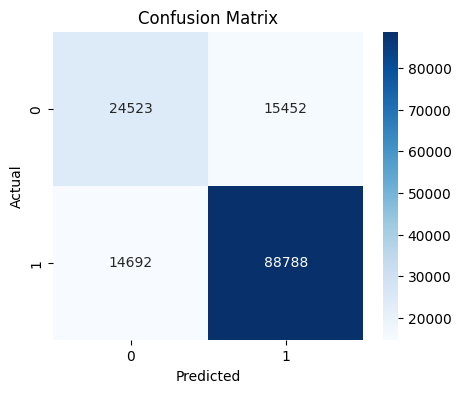

In [42]:
# ---------------------------------------------------------
# 7. PREDICTIONS (probabilities only)
# ---------------------------------------------------------
y_prob = model.predict(X_test)


# ---------------------------------------------------------
# 8. FIND BEST THRESHOLD (based on F1-score)
# ---------------------------------------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_thr = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print("\n🔹 Best Threshold:", round(best_thr, 4))
print("🔹 Best F1-score:", round(best_f1, 4))


# ---------------------------------------------------------
# 9. FINAL PREDICTIONS USING BEST THRESHOLD
# ---------------------------------------------------------
y_pred = (y_prob >= 0.41).astype(int)


# ---------------------------------------------------------
# 10. METRICS (using optimized threshold)
# ---------------------------------------------------------
auc = roc_auc_score(y_test, y_prob)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- MODEL PERFORMANCE (Optimized Threshold) ---")
print(f"AUC:       {auc:.4f}")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# ---------------------------------------------------------
# 13. CLASSIFICATION REPORT
# ---------------------------------------------------------
print("\n--- Classification Report (Optimized Threshold) ---")
print(classification_report(y_test, y_pred))

# ---------------------------------------------------------
# 11. CONFUSION MATRIX 
# ---------------------------------------------------------

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
# Save original row indices for mapping later
train_idx = y_train.index
test_idx  = y_test.index

In [23]:
print(best_thr)

0.24751571221748353


In [24]:
# ---------------------------------------------------------
# 7. PREDICT PROBABILITY → CONFIDENCE
# ---------------------------------------------------------

# TRAIN
train_prob = model.predict(X_train)
train_conf = train_prob * 100
train_pred = (train_prob >= best_thr).astype(int)

df_train_pred = pd.DataFrame({
    "True_Label": y_train.values,
    "Pred_Label": train_pred,
    "Prob_Approved": train_prob,
    "Confidence_%": train_conf
}, index=train_idx)

In [25]:
# TEST
test_prob = model.predict(X_test)
test_conf = test_prob * 100
test_pred = (test_prob >= best_thr).astype(int)

df_test_pred = pd.DataFrame({
    "True_Label": y_test.values,
    "Pred_Label": test_pred,
    "Prob_Approved": test_prob,
    "Confidence_%": test_conf
}, index=test_idx)

In [26]:
# ---------------------------------------------------------
# 8. MAP BACK TO df_ml (NO NEED FOR ID COLUMN!)
# ---------------------------------------------------------

df_ml["Pred_Label"] = np.nan
df_ml["Prob_Approved"] = np.nan
df_ml["Confidence_%"] = np.nan

df_ml.loc[train_idx, ["Pred_Label", "Prob_Approved", "Confidence_%"]] = \
    df_train_pred[["Pred_Label", "Prob_Approved", "Confidence_%"]]

df_ml.loc[test_idx, ["Pred_Label", "Prob_Approved", "Confidence_%"]] = \
    df_test_pred[["Pred_Label", "Prob_Approved", "Confidence_%"]]

In [27]:
cols_to_drop = [
    'SDX_Set_embeddings', 'PRIM_DX_emb', 'SDX_agg_emb', 'Tax_ID',
    'DISP_Code', 'DischargeYear', 'DischargeMonth',
    'MRREQ', 'MRREC', 
    'InitialDeterminationDate', 'InitialDenialType',
    
]

df_ml1 = df_ml.drop(columns=cols_to_drop, errors='ignore')
df_ml1.head()

,Provider_ID,AGE,LOS,PaymentType,Payments,LOB,Group_Type,HospitalName,ADRG,PRIM_DX,SDX_Type,SDX_Set_tuple,Status_binary,Final_Wt,sample_weight,final_weight,Pred_Label,Prob_Approved,Confidence_%
0,000334584002,69,9,prepay,15948.41,NYCARE,01,ST LUKES CORNWALL HOSPITAL,432,K7030,MCC,"(I8511, N170)",1,1.0,0.386311,0.386311,1.0,0.797882,79.788191
1,000258115003,62,5,prepay,10477.92,NYCARE,01,ST PETERS HOSPITAL,919,T85698A,MCC,"(A419, J869)",1,1.0,0.386311,0.386311,1.0,0.729202,72.920188
2,000657681001,77,3,prepay,11532.33,NYCARE,01,KENMORE MERCY HOSPITAL,871,A419,MCC,"(G9341, J159, R6520)",0,1.0,1.000000,1.000000,1.0,0.436475,43.647519
3,000023698002,60,2,postpay,12227.79,IADSNP,01,ALLEN HOSPITAL,854,A419,CC,"(N136, N179, Z6843)",0,1.0,1.000000,1.000000,0.0,0.073674,7.367397
4,000023698002,70,5,postpay,10804.16,IADSNP,01,ALLEN HOSPITAL,871,A419,MCC,"(D61810, G9341, R6520)",1,1.0,0.386311,0.386311,1.0,0.251632,25.163244


In [ ]:
df_ml1["Correct"] = (df_ml1["Pred_Label"] == df_ml1["Status_binary"]).astype(int)
df_true_pairs = df_ml1[df_ml1["Correct"] == 1].copy()
df_true_pairs.info()


In [ ]:
df_true_pairs.head()

In [ ]:
df_ml2 = df_ml1[df_ml1["Pred_Label"] == 0.0]
df_ml2.info()


In [ ]:
df_ml2.head()


In [ ]:
df_ml3 = df_ml2[df_ml2["Status_binary"] == 1]
df_ml3.info()

In [ ]:
df_ml3.head(50)

In [37]:
# new method
import numpy as np
from sklearn.metrics import matthews_corrcoef

def find_best_mcc_threshold(y_true, y_prob, step=0.01):
    """
    Find best threshold using MCC (best for imbalanced datasets)
    """
    thresholds = np.arange(0, 1 + step, step)
    mcc_scores = []

    for thr in thresholds:
        y_pred = (y_prob >= thr).astype(int)
        mcc = matthews_corrcoef(y_true, y_pred)
        mcc_scores.append(mcc)

    best_idx = np.argmax(mcc_scores)
    best_thr = thresholds[best_idx]
    best_mcc = mcc_scores[best_idx]

    return best_thr, best_mcc, thresholds, mcc_scores


# -------------------- USE IT --------------------
best_thr, best_mcc, thresholds, mcc_scores = find_best_mcc_threshold(y_test, y_prob)

print("\n🔹 Best MCC Threshold:", round(best_thr, 4))
print("🔹 Best MCC Score:    ", round(best_mcc, 4))



🔹 Best MCC Threshold: 0.41
🔹 Best MCC Score:     0.4743



--- MODEL PERFORMANCE (Optimized Threshold) ---
AUC:       0.8234
Accuracy:  0.7899
Precision: 0.8518
Recall:    0.8580
F1 Score:  0.8549

--- Classification Report (Optimized Threshold) ---
              precision    recall  f1-score   support

           0       0.63      0.61      0.62     39975
           1       0.85      0.86      0.85    103480

    accuracy                           0.79    143455
   macro avg       0.74      0.74      0.74    143455
weighted avg       0.79      0.79      0.79    143455



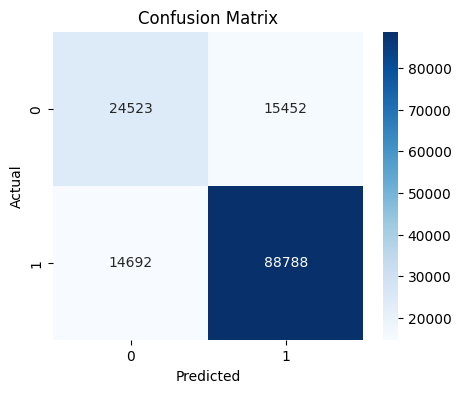

In [38]:
# ---------------------------------------------------------
# 7. PREDICTIONS (probabilities only)
# ---------------------------------------------------------
#y_prob = model.predict(X_test)




# ---------------------------------------------------------
# 9. FINAL PREDICTIONS USING BEST THRESHOLD
# ---------------------------------------------------------
y_pred = (y_prob >= best_thr).astype(int)


# ---------------------------------------------------------
# 10. METRICS (using optimized threshold)
# ---------------------------------------------------------
auc = roc_auc_score(y_test, y_prob)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- MODEL PERFORMANCE (Optimized Threshold) ---")
print(f"AUC:       {auc:.4f}")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# ---------------------------------------------------------
# 13. CLASSIFICATION REPORT
# ---------------------------------------------------------
print("\n--- Classification Report (Optimized Threshold) ---")
print(classification_report(y_test, y_pred))

# ---------------------------------------------------------
# 11. CONFUSION MATRIX 
# ---------------------------------------------------------

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()